Problem Set 1
Maire Taegan Mullane
4/6/25

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
file1_path = "src/lalonde_experimental.txt"
data =  pd.DataFrame(np.loadtxt(file1_path))
data.columns = ["treat", "wage"]
data

,treat,wage
0,0.0,0.0000
1,0.0,12.3837
2,0.0,0.0000
3,0.0,10.7401
4,0.0,11.7965
...,...,...
440,1.0,15.9526
441,1.0,36.6469
442,1.0,12.8040
443,1.0,3.7866


1. a. est null hypothesis that there is no effect of the training program on earnings using a t-stat

Calculate difference in means

In [3]:
Y_1 = data[data.treat== 1]['wage'].mean()
Y_0 = data[data.treat== 0]['wage'].mean()
N = float(len(data))
M = float(len(data[data.treat == 1]))

In [4]:
diff = (Y_1- Y_0)
print(f"Difference in means is: {diff:.2f}")

Difference in means is: 1.79


Calculate unbiased variance and the variance of the difference in means

In [5]:
s_0_sq =(1/(N-M-1)) * sum((data[data.treat == 0].wage - Y_0)**2)
s_1_sq = 1/(M - 1) * sum((data[data.treat == 1].wage - Y_1)**2)

In [6]:
s_diff_sq = s_0_sq/(N-M) + s_1_sq/M
print(f"Variance of the difference in means is: {s_diff_sq:.2f}")

Variance of the difference in means is: 0.45


In [7]:
ttest = float(diff/(math.sqrt(s_diff_sq)))
print(f"t-test = {ttest:.5f}")

t-test = 2.67414


In [8]:
p = 2 * (1-norm.cdf(abs(ttest)))
print(f"p-value = {p:.5f}")

p-value = 0.00749


1.b.

In [9]:
np.random.seed(123)
base = np.array([1]*int(M) + [0]*int((N - M)))
random_treat = np.array([np.random.permutation(base) for _ in range(1000000)])

In [11]:
wages = data["wage"].to_numpy()
wages_expand = wages[None, :]
treated = random_treat == 1
control = random_treat == 0

treated_means = np.sum(treated * wages_expand, axis=1) / np.sum(treated, axis=1)
control_means = np.sum(control * wages_expand, axis=1) / np.sum(control, axis=1)

ates = treated_means - control_means

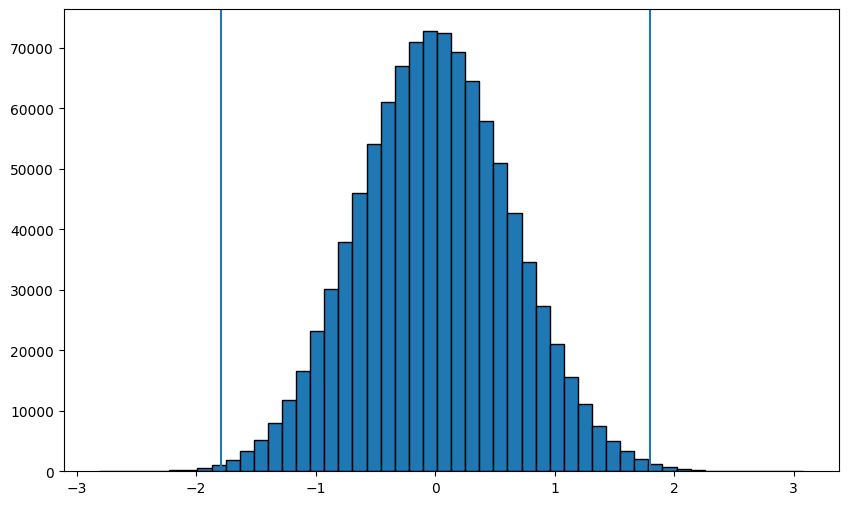

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(ates, bins=50, edgecolor='black')
plt.axvline(-diff)
plt.axvline(diff)
#save figure
plt.savefig("randomized_distribution.png", dpi=300)

In [13]:
print("p-value = ", np.mean(abs(ates) > diff))

p-value =  0.004191


c.

In [14]:
data["R"]  = data['wage'].apply(lambda y: (data['wage'] < y).sum() + 0.5 * (1 + (data['wage'] == y).sum()) - (N + 1)/2)

In [15]:
data["R"].mean()

np.float64(0.0)

In [16]:
print("mean of treated", data[data.treat== 1]['R'].mean(), "mean of control", data[data.treat == 0]['R'].mean())

mean of treated 18.12162162162162 mean of control -12.89423076923077


In [17]:
diff_r = data[data.treat== 1]['R'].mean() -  data[data.treat== 0]['R'].mean()
diff_r

np.float64(31.01585239085239)

In [18]:
rank = data["R"].to_numpy()
rank_expand = rank[None, :]

In [19]:
treated_means_rank = np.sum(treated * rank_expand, axis=1) / np.sum(treated, axis=1)
control_means_rank = np.sum(control * rank_expand, axis=1) / np.sum(control, axis=1)

ates_rank = treated_means_rank - control_means_rank

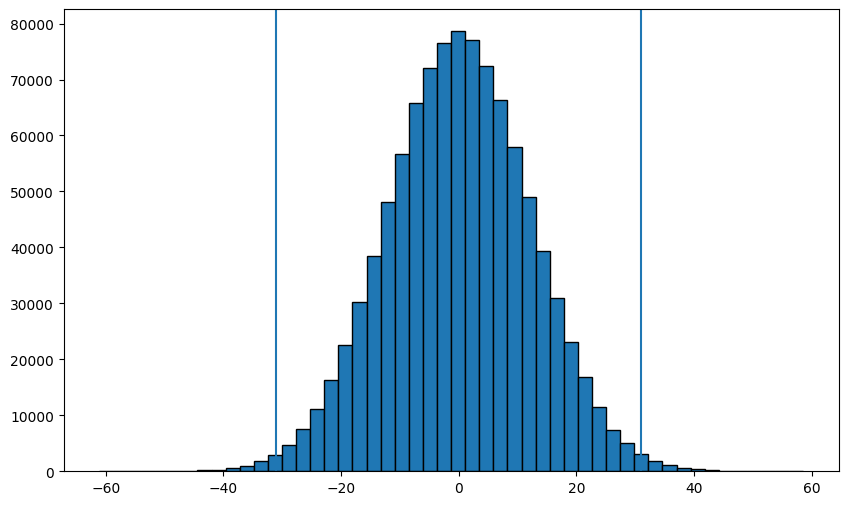

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(ates_rank, bins=50, edgecolor='black')
plt.axvline(-diff_r)
plt.axvline(diff_r)
plt.savefig("rank_randomized.png", dpi=300)

In [22]:
# count what the rate of ates are less than T_obs
print("p-value = ", np.mean(abs(ates_rank) > abs(diff_r)))

p-value =  0.011021


In [23]:
len(data[data.wage == 0])

137

1.d.

In [24]:
# 95% confidence intervals
ci_lower = diff - 1.96 * np.sqrt(s_diff_sq)
ci_upper = diff + 1.96 * np.sqrt(s_diff_sq)
print(ci_lower, ci_upper)

0.47918825782718666 3.109494216185289


Now calculate the homoskedastic variance 

In [25]:
mean_1 = np.mean(data.wage[data.treat==1])
mean_0 = np.mean(data.wage[data.treat==0])

def error_term(row):
    if row['treat'] == 1:
        return row.wage - mean_1
    else:
        return row.wage - mean_0

# apply the error term function to each row of the data
data['error'] = data.apply(error_term, axis=1)

The homoskedastic varriance estimate is larger than the Neyman variance estimator.

In [26]:
mean_treat = np.mean(data.treat)
var_homo = np.sum((data.error)**2/N)/np.sum((data.treat-mean_treat)**2)
var_homo

np.float64(0.3987032422735858)

In [28]:
# 95% confidence intervals
ci_lower_homo = diff - 1.96 * np.sqrt(var_homo)
ci_upper_homo = diff + 1.96 * np.sqrt(var_homo)
print(ci_lower_homo, ci_upper_homo)

0.5567393723024847 3.031943101709991


2.

In [29]:
sig = 0.05
std_dev = 6.63
effect = 1.79
power = 0.8
gamma = data.treat.mean()

In [30]:
n = (((norm.ppf(1-sig/2) + norm.ppf(0.8))**2)/((effect**2)/std_dev))
n

np.float64(16.241088804573657)

In [31]:
n_diff_obs = ((norm.ppf(1-sig/2) + norm.ppf(0.8))**2)/(gamma*(1-gamma)*effect**2/std_dev)
n_diff_obs

np.float64(66.86365094648022)

b.

In [32]:
effect = 0.11
std_dev = 0.46

In [33]:
n = (((norm.ppf(1-sig/2) + norm.ppf(0.8))**2)/((effect**2)/std_dev))
n

np.float64(298.38716345459346)

In [34]:
n_diff_obs = ((norm.ppf(1-sig/2) + norm.ppf(0.8))**2)/(gamma*(1-gamma)*effect**2/std_dev)
n_diff_obs

np.float64(1228.4432025591657)

The difference in sample size is required to find a significant effect is related to the size of the effect desired. Since the second effect size is smaller, it requires a larger sample size for significance to be found. This is because in order to have the same amount of power, you need a larger sample size to ensure the result is not being driven by the noise of the random sample rather than the underlying true relationship. 